# Download Data

In [ ]:
!wget -O snaphsot_serengeti_cropped_single_animals.zip "https://zenodo.org/records/11102888/files/snaphsot_serengeti_cropped_single_animals.zip?download=1"

--2024-11-19 20:56:04--  https://zenodo.org/records/11102888/files/snaphsot_serengeti_cropped_single_animals.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.184.98.238, 188.184.103.159, 188.185.79.172, ...
Connecting to zenodo.org (zenodo.org)|188.184.98.238|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20480015768 (19G) [application/octet-stream]
Saving to: ‘snaphsot_serengeti_cropped_single_animals.zip’

snaphsot_serengeti_ 100%[===================>]  19.07G  12.7MB/s    in 26m 5s  

2024-11-19 21:22:09 (12.5 MB/s) - ‘snaphsot_serengeti_cropped_single_animals.zip’ saved [20480015768/20480015768]



In [ ]:
# Download train dataset
!wget -O train_dataset_crops_single_animal_template_captions_T1T7_ID.csv "https://zenodo.org/records/11102888/files/train_dataset_crops_single_animal_template_captions_T1T7_ID.csv?download=1"

# Download test dataset
!wget -O test_dataset_crops_single_animal_template_captions_T1T8T10.csv "https://zenodo.org/records/11102888/files/test_dataset_crops_single_animal_template_captions_T1T8T10.csv?download=1"

# Download validation dataset
!wget -O val_dataset_crops_single_animal_template_captions_T1T7_ID.csv "https://zenodo.org/records/11102888/files/val_dataset_crops_single_animal_template_captions_T1T7_ID.csv?download=1"

--2024-11-19 21:29:26--  https://zenodo.org/records/11102888/files/train_dataset_crops_single_animal_template_captions_T1T7_ID.csv?download=1
Resolving zenodo.org (zenodo.org)... 188.184.103.159, 188.185.79.172, 188.184.98.238, ...
Connecting to zenodo.org (zenodo.org)|188.184.103.159|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 894463239 (853M) [text/plain]
Saving to: ‘train_dataset_crops_single_animal_template_captions_T1T7_ID.csv’

train_dataset_crops 100%[===================>] 853.03M  19.4MB/s    in 42s     

2024-11-19 21:30:09 (20.3 MB/s) - ‘train_dataset_crops_single_animal_template_captions_T1T7_ID.csv’ saved [894463239/894463239]

--2024-11-19 21:30:09--  https://zenodo.org/records/11102888/files/test_dataset_crops_single_animal_template_captions_T1T8T10.csv?download=1
Resolving zenodo.org (zenodo.org)... 188.184.98.238, 188.185.79.172, 188.184.103.159, ...
Connecting to zenodo.org (zenodo.org)|188.184.98.238|:443... connected.
HTTP request sent, 

In [ ]:
!unzip snaphsot_serengeti_cropped_single_animals.zip


Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: snaphsot_serengeti_cropped_single_animals/S4/R08/S4_R08_R1_IMAG0903_crop_0.jpg  
  inflating: snaphsot_serengeti_cropped_single_animals/S4/R08/S4_R08_R1_IMAG0902_crop_0.jpg  
  inflating: snaphsot_serengeti_cropped_single_animals/S4/R08/S4_R08_R1_IMAG0897_crop_0.jpg  
  inflating: snaphsot_serengeti_cropped_single_animals/S4/R08/S4_R08_R2_IMAG0365_crop_0.jpg  
  inflating: snaphsot_serengeti_cropped_single_animals/S4/R08/S4_R08_R2_IMAG0373_crop_0.jpg  
  inflating: snaphsot_serengeti_cropped_single_animals/S4/R08/S4_R08_R1_IMAG0900_crop_0.jpg  
  inflating: snaphsot_serengeti_cropped_single_animals/S4/R08/S4_R08_R2_IMAG0540_crop_0.jpg  
  inflating: snaphsot_serengeti_cropped_single_animals/S4/R08/S4_R08_R2_IMAG0350_crop_0.jpg  
  inflating: snaphsot_serengeti_cropped_single_animals/S4/R08/S4_R08_R2_IMAG0366_crop_0.jpg  
  inflating: snaphsot_serengeti_cropped_single_animals/S4/R08/S4_R08_R2_IMAG0515_crop_0.jpg  

In [ ]:
!rm snaphsot_serengeti_cropped_single_animals.zip

# Organize data

In [ ]:
import os
import pandas as pd
import shutil

In [ ]:
!mkdir -p data
df_train=pd.read_csv('train_dataset_crops_single_animal_template_captions_T1T7_ID.csv')
df_val=pd.read_csv('val_dataset_crops_single_animal_template_captions_T1T7_ID.csv')
df_test=pd.read_csv('test_dataset_crops_single_animal_template_captions_T1T8T10.csv')


In [ ]:
info_folder={'train':df_train,'val':df_val,'test':df_test}
path='snaphsot_serengeti_cropped_single_animals'
for split_folder,info in info_folder.items():
  print(split_folder)
  for _,row in info.iterrows():
    species_id=str(row['species_id'])
    crop_path=row['crop_path']
    crop_path=os.path.join(path,crop_path)
    if os.path.exists(crop_path):
      img_name=crop_path.split('/')[-1]
      move_path=os.path.join('data',split_folder,species_id)
      if not os.path.exists(move_path):
        os.makedirs(move_path)
      move_path=os.path.join('data',split_folder,species_id,img_name)
      shutil.copy(crop_path,move_path)

train
val
test


In [ ]:
!rm -r snaphsot_serengeti_cropped_single_animals

## Explore the data

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from PIL import Image

In [ ]:
# Config
sns.set(style="whitegrid")
base_data_path = 'data'
def count_images_by_class(base_path):
    data_distribution = {}
    for split in ['train', 'val', 'test']:
        split_path = os.path.join(base_path, split)
        class_counts = {}
        if os.path.exists(split_path):
            for class_name in os.listdir(split_path):
                class_path = os.path.join(split_path, class_name)
                if os.path.isdir(class_path):
                    class_counts[class_name] = len(os.listdir(class_path))
        data_distribution[split] = class_counts
    return data_distribution
def show_sample_images(base_path, split, num_images=6):
    split_path = os.path.join(base_path, split)
    if not os.path.exists(split_path):
        print(f"No hay imágenes en el conjunto {split}.")
        return

    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    class_dirs = os.listdir(split_path)
    for i, ax in enumerate(axes):
        if i >= len(class_dirs):
            break
        class_dir = os.path.join(split_path, class_dirs[i])
        if os.path.isdir(class_dir):
            img_files = os.listdir(class_dir)
            if img_files:
                img_path = os.path.join(class_dir, img_files[0])
                img = Image.open(img_path)
                ax.imshow(img)
                ax.set_title(f"{split} - Clase {class_dirs[i]}")
                ax.axis("off")
    plt.suptitle(f"Muestras de imágenes en {split.upper()}")
    plt.tight_layout()
    plt.show()




## Image 1 Proportion of images per class

<ipython-input-12-7621aeb6b1f6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


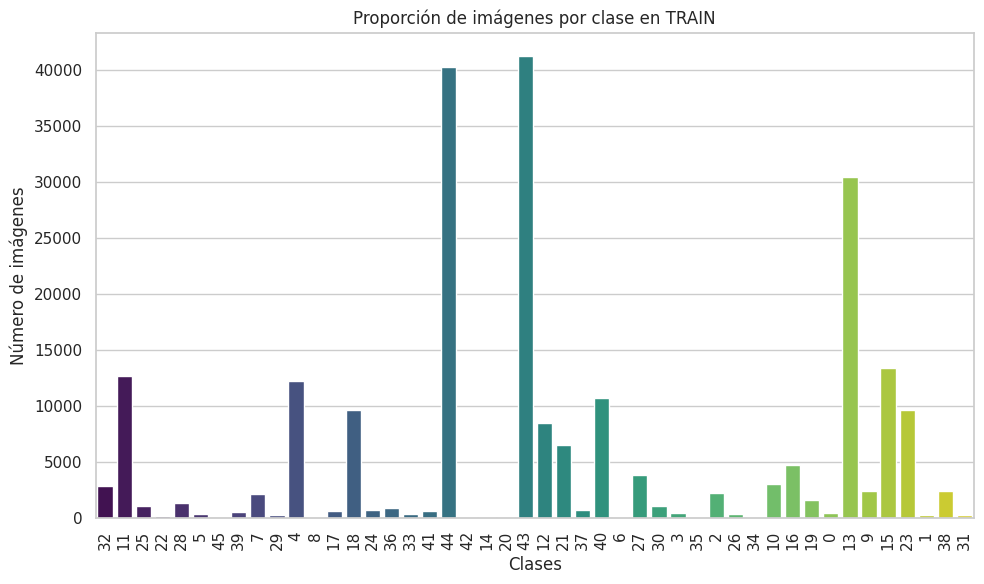

<ipython-input-12-7621aeb6b1f6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


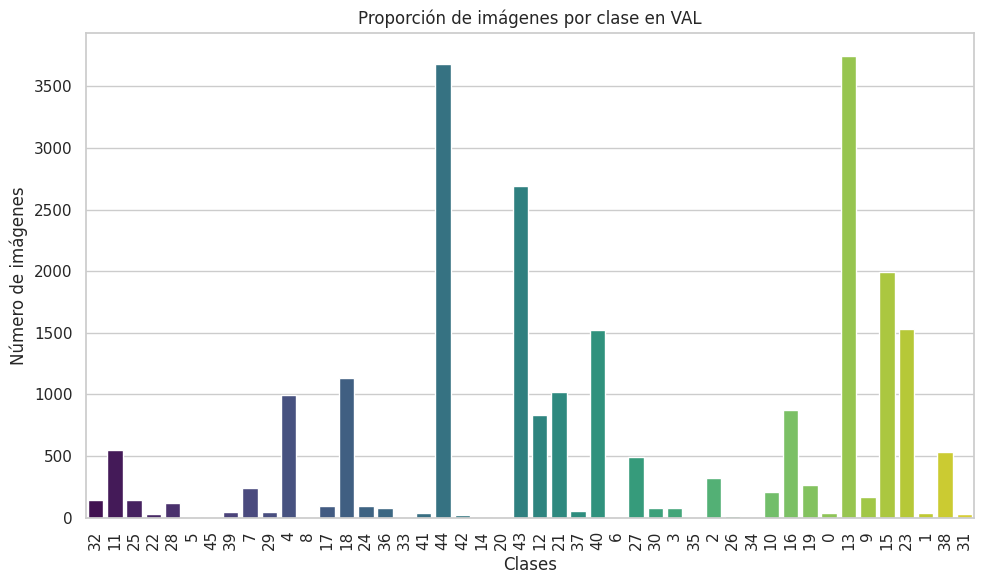

<ipython-input-12-7621aeb6b1f6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


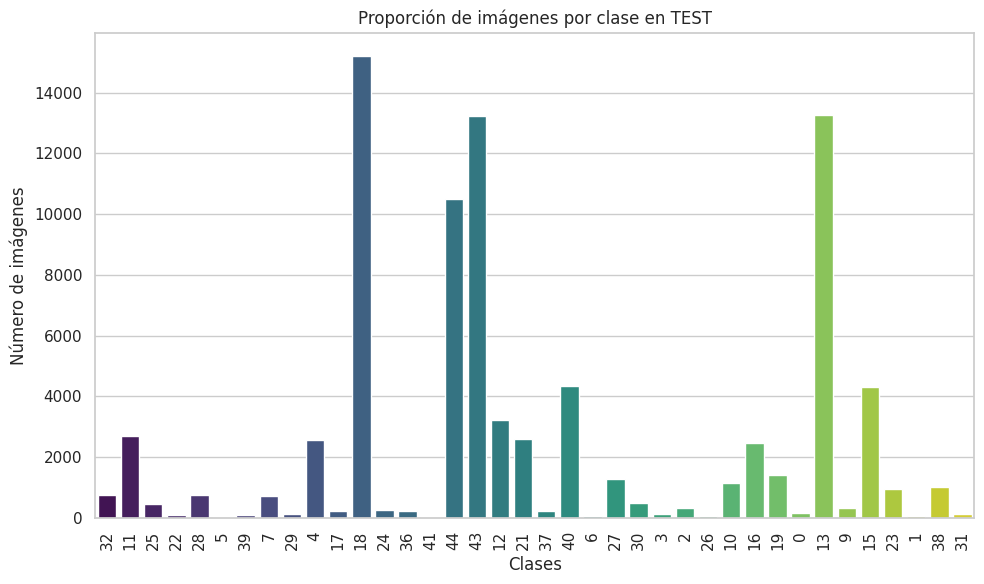

In [ ]:
data_distribution = count_images_by_class(base_data_path)
for split, counts in data_distribution.items():
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=list(counts.keys()),
        y=list(counts.values()),
        palette="viridis"
    )
    plt.title(f"Proporción de imágenes por clase en {split.upper()}")
    plt.xlabel("Clases")
    plt.ylabel("Número de imágenes")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()



# Image 2 Distribution by split

<ipython-input-13-17220f42314d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


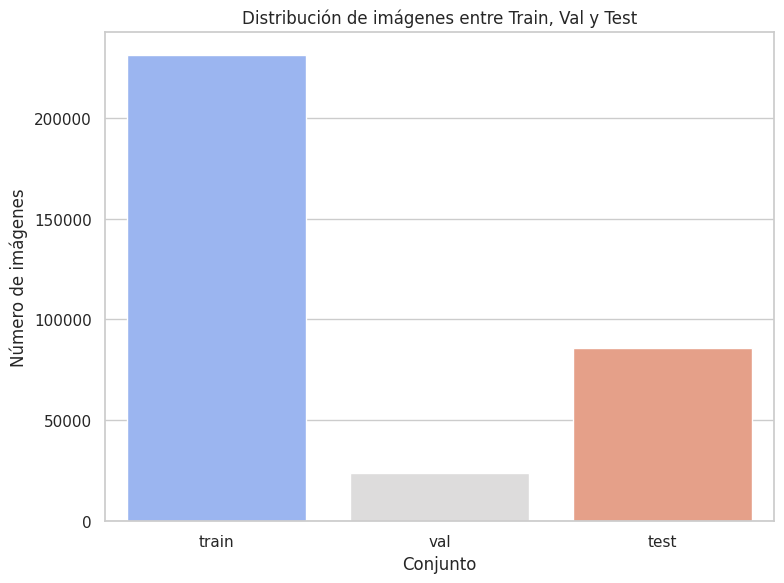

In [ ]:

total_counts = {split: sum(counts.values()) for split, counts in data_distribution.items()}
plt.figure(figsize=(8, 6))
sns.barplot(
    x=list(total_counts.keys()),
    y=list(total_counts.values()),
    palette="coolwarm"
)
plt.title("Distribución de imágenes entre Train, Val y Test")
plt.xlabel("Conjunto")
plt.ylabel("Número de imágenes")
plt.tight_layout()
plt.show()



## Image 3 Show images examples

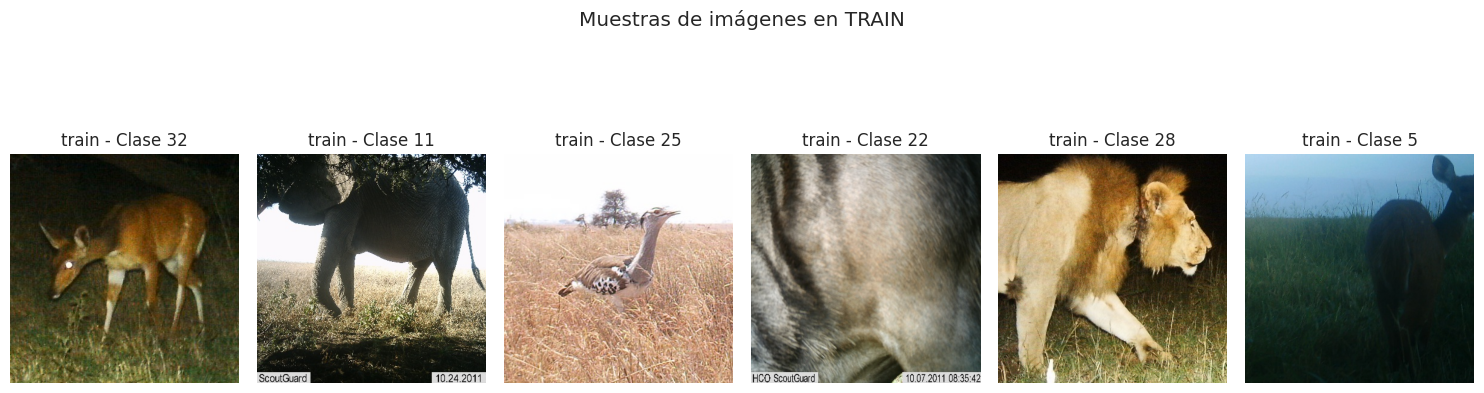

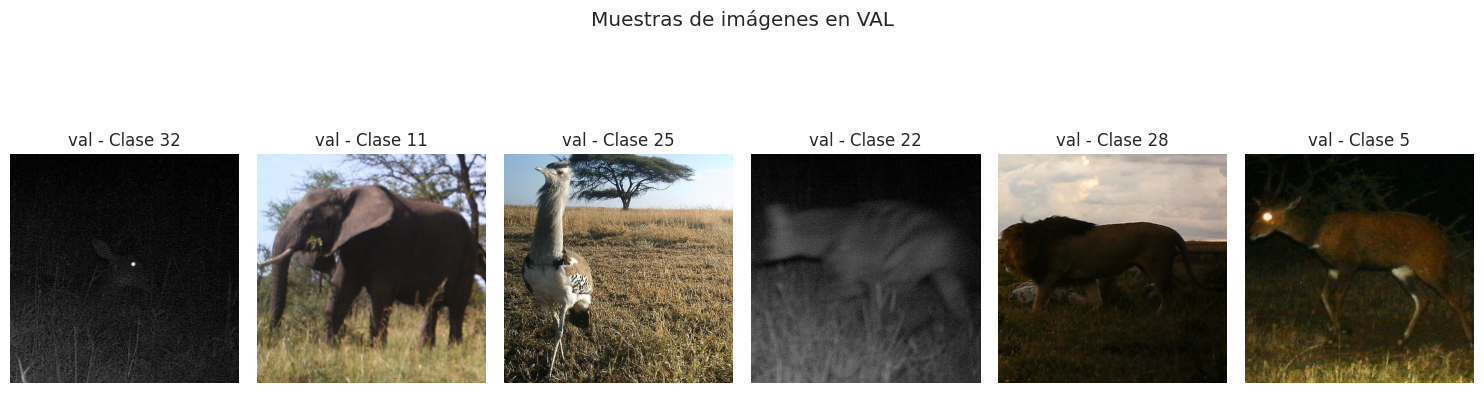

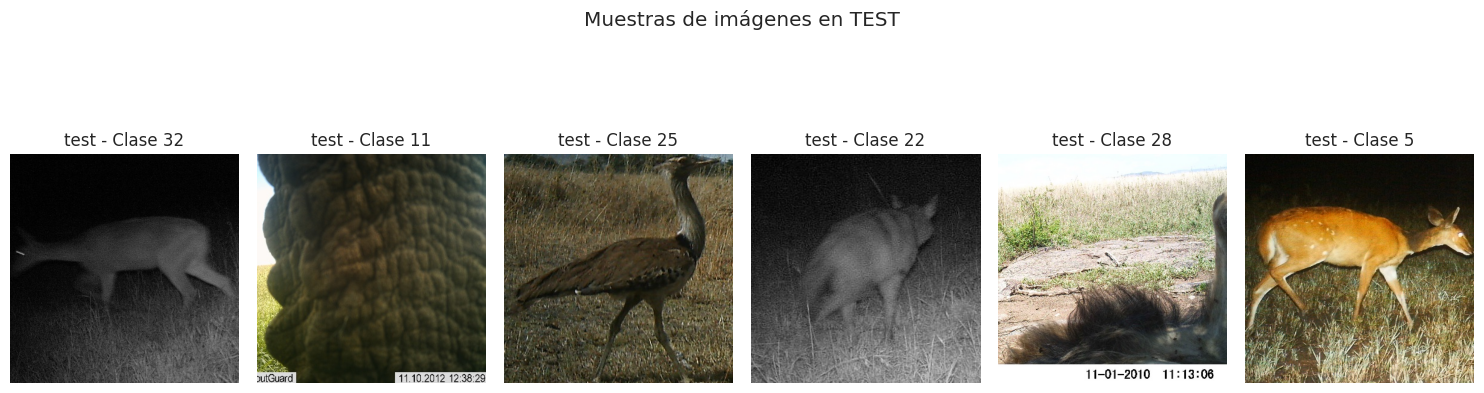

In [ ]:
# Mostrar muestras de imágenes para train, val, y test
for split in ['train', 'val', 'test']:
    show_sample_images(base_data_path, split, num_images=6)